In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as ply

In [2]:
data = pd.read_csv('013 IndexE8.csv')

In [3]:
data.head()

date     spx      dax     ftse    nikkei
0  07/01/1994  469.90  2224.95  3445.98  18124.01
1  10/01/1994  475.27  2225.00  3440.58  18443.44
2  11/01/1994  474.13  2228.10  3413.77  18485.25
3  12/01/1994  474.17  2182.06  3372.02  18793.88
4  13/01/1994  472.47  2142.37  3360.01  18577.26

In [4]:
data.date = pd.to_datetime(data.date, dayfirst=False)

In [5]:
data

date          spx       dax         ftse    nikkei
0    1994-07-01   469.900000   2224.95  3445.980000  18124.01
1    1994-10-01   475.270000   2225.00  3440.580000  18443.44
2    1994-11-01   474.130000   2228.10  3413.770000  18485.25
3    1994-12-01   474.170000   2182.06  3372.020000  18793.88
4    1994-01-13   472.470000   2142.37  3360.010000  18577.26
...         ...          ...       ...          ...       ...
6264 2018-01-23  2839.130362  13559.60  7731.827774  24124.15
6265 2018-01-24  2837.544008  13414.74  7643.428966  23940.78
6266 2018-01-25  2839.253031  13298.36  7615.839954  23669.49
6267 2018-01-26  2872.867839  13340.17  7665.541292  23631.88
6268 2018-01-29  2853.528411  13324.48  7671.533300  23629.34

[6269 rows x 5 columns]

In [6]:
df_spx = data[['date', 'spx']]

In [7]:
df_spx.head()

date     spx
0 1994-07-01  469.90
1 1994-10-01  475.27
2 1994-11-01  474.13
3 1994-12-01  474.17
4 1994-01-13  472.47

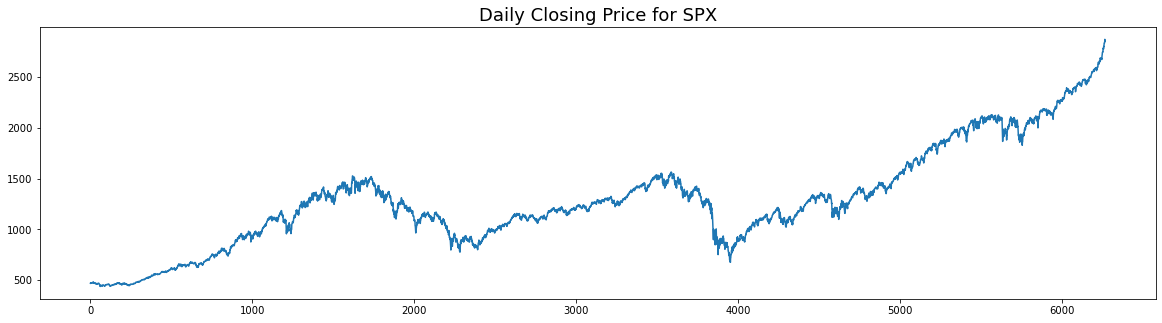

In [8]:
df_spx.spx.plot(figsize=(20,5))
plt.title('Daily Closing Price for SPX', size=18)
plt.show()

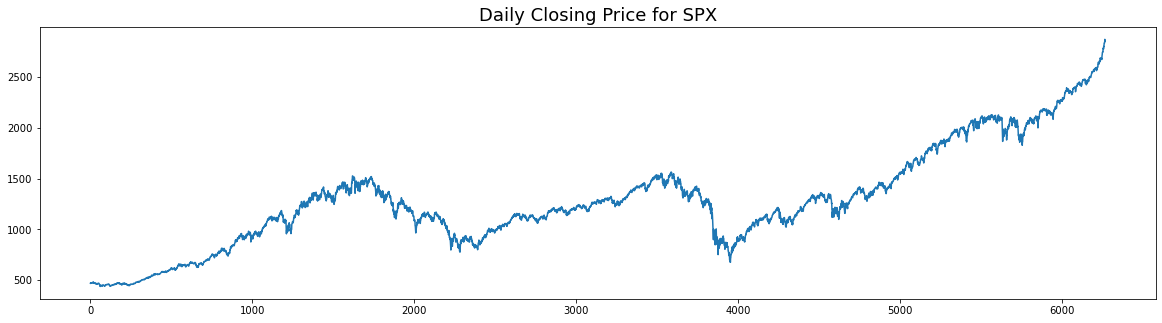

In [9]:
df_spx.spx.plot(figsize=(20,5))
plt.title('Daily Closing Price for SPX', size=18)
plt.show()

In [10]:
#model
from fbprophet import Prophet

In [13]:
df_spx = df_spx.rename(columns={'date':'ds', 'spx':'y'})
df_spx.head()

ds       y
0 1994-07-01  469.90
1 1994-10-01  475.27
2 1994-11-01  474.13
3 1994-12-01  474.17
4 1994-01-13  472.47

In [16]:
model_daily = Prophet(daily_seasonality=True)
model_daily.fit(df_spx)

In [17]:
future = model_daily.make_future_dataframe(periods=365)
future.tail()

ds
6629 2019-11-27
6630 2019-11-28
6631 2019-11-29
6632 2019-11-30
6633 2019-12-01

In [18]:
# Python
forecast = model_daily.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
6629 2019-11-27  2837.557980  2692.693542  2969.389226
6630 2019-11-28  2836.036788  2698.928535  2970.029397
6631 2019-11-29  2835.502653  2700.248396  2970.170605
6632 2019-11-30  2835.695873  2705.468704  2976.913818
6633 2019-12-01  2837.280306  2697.431634  2972.440207

In [20]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)

ds        yhat  yhat_lower  yhat_upper
0 1994-01-02  449.209472  350.659102  552.202219
1 1994-01-03  443.804943  337.904452  544.500302
2 1994-01-04  444.850055  335.305191  548.952372
3 1994-01-06  444.307892  337.301095  554.400806
4 1994-01-07  444.043613  334.156830  551.085128
5 1994-01-08  444.268077  337.247379  540.617807
6 1994-01-09  445.639681  344.179116  547.550464
7 1994-01-11  437.918962  325.551878  552.243672
8 1994-01-12  437.129227  335.708905  534.851685
9 1994-01-13  435.139360  329.786650  542.716883

Text(0.5, 33.0, 'Date')

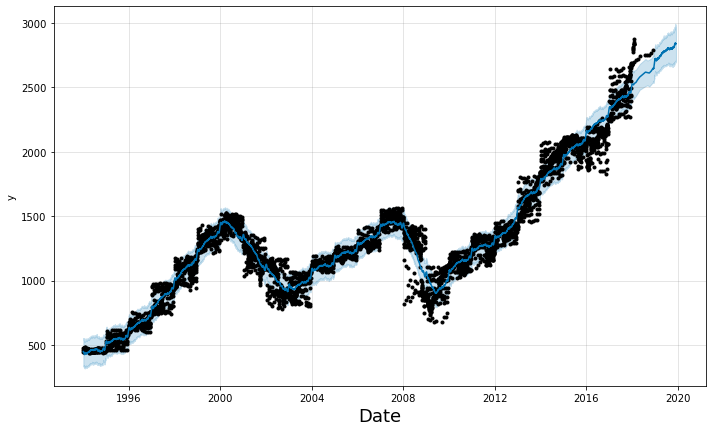

In [23]:
# Python
fig1 = model_daily.plot(forecast)
plt.xlabel('Date', size = 18)

In [25]:
data.tail(10)

date          spx       dax         ftse    nikkei
6259 2018-01-16  2776.420024  13246.33  7755.931441  23951.81
6260 2018-01-17  2802.555574  13183.96  7725.432076  23868.34
6261 2018-01-18  2798.030257  13281.43  7700.963484  23763.37
6262 2018-01-19  2810.302683  13434.45  7730.787919  23808.06
6263 2018-01-22  2832.974100  13463.69  7715.441534  23816.33
6264 2018-01-23  2839.130362  13559.60  7731.827774  24124.15
6265 2018-01-24  2837.544008  13414.74  7643.428966  23940.78
6266 2018-01-25  2839.253031  13298.36  7615.839954  23669.49
6267 2018-01-26  2872.867839  13340.17  7665.541292  23631.88
6268 2018-01-29  2853.528411  13324.48  7671.533300  23629.34

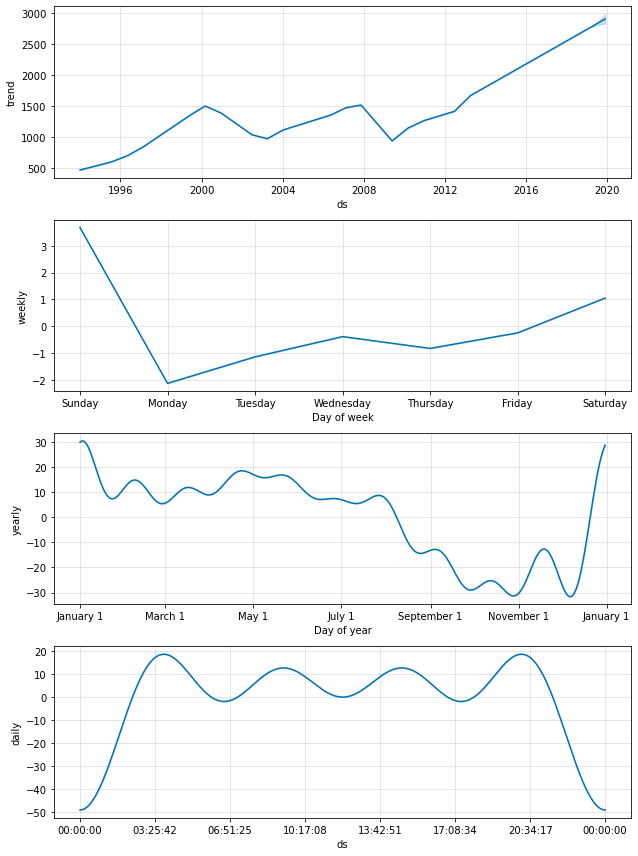

In [26]:
# Python
fig2 = model_daily.plot_components(forecast)

In [27]:
# Python
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model_daily, forecast)

In [28]:
#Python
plot_components_plotly(model_daily, forecast)

In [29]:
model_yearly = Prophet(yearly_seasonality=True)
model_yearly.fit(df_spx)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
future = model_yearly.make_future_dataframe(periods=1)
future.tail()

ds
6265 2018-09-01
6266 2018-10-01
6267 2018-11-01
6268 2018-12-01
6269 2018-12-02

In [32]:
forecast = model_yearly.predict(future)
forecast.head()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 1994-01-02  415.266189  342.691115  557.561787   415.266189   415.266189   
1 1994-01-03  415.497856  333.959605  539.725502   415.497856   415.497856   
2 1994-01-04  415.729524  335.817157  542.959272   415.729524   415.729524   
3 1994-01-06  416.192859  342.201880  549.342618   416.192859   416.192859   
4 1994-01-07  416.424526  343.923554  544.140130   416.424526   416.424526   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       34.136748             34.136748             34.136748  3.786737   
1       28.377928             28.377928             28.377928 -2.143873   
2       29.165280             29.165280             29.165280 -1.172947   
3       28.189623             28.189623             28.189623 -0.817301   
4       27.656405             27.656405             27.656405 -0.267948   

   weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
0      3.786737      3.786737  30.350012     30.350012     30.350012   
1     -2.143873     -2.143873  30.521802     30.521802     30.521802   
2     -1.172947     -1.172947  30.338227     30.338227     30.338227   
3     -0.817301     -0.817301  29.006924     29.006924     29.006924   
4     -0.267948     -0.267948  27.924353     27.924353     27.924353   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper        yhat  
0                         0.0  449.402937  
1                         0.0  443.875785  
2                         0.0  444.894804  
3                         0.0  444.382482  
4                         0.0  444.080932

In [33]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
6265 2018-09-01  2614.648897  2511.701082  2716.713825
6266 2018-10-01  2611.246611  2506.172597  2710.070543
6267 2018-11-01  2626.739531  2528.895820  2736.919794
6268 2018-12-01  2647.748079  2551.179740  2751.681598
6269 2018-12-02  2649.661399  2549.637343  2756.979643

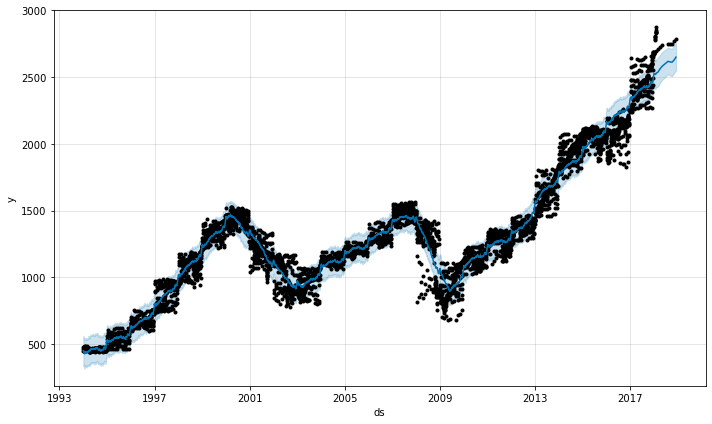

In [34]:
fig = model_yearly.plot(forecast)

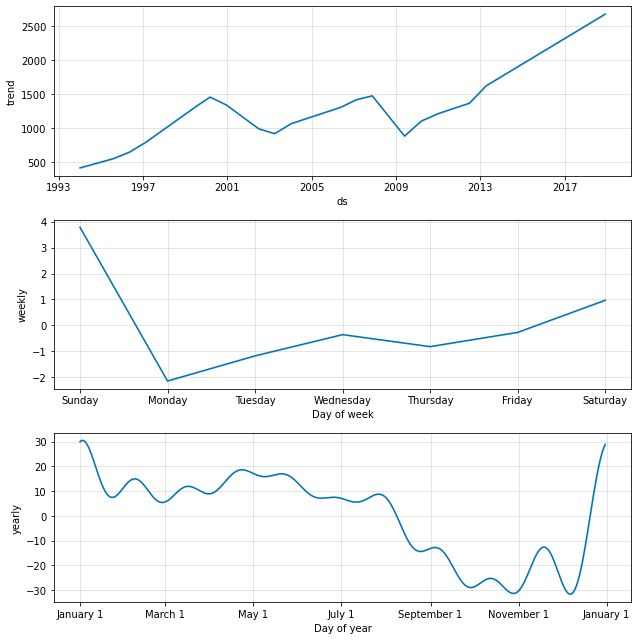

In [35]:
fig2 = model_yearly.plot_components(forecast)

In [36]:
#Weekly
model_weekly = Prophet(weekly_seasonality=True)
model_weekly.fit(df_spx)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
future = model_weekly.make_future_dataframe(periods=52)

In [38]:
future.tail()

ds
6316 2019-01-18
6317 2019-01-19
6318 2019-01-20
6319 2019-01-21
6320 2019-01-22

In [39]:
forecast = model_weekly.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
6316 2019-01-18  2708.450180  2602.472735  2808.665410
6317 2019-01-19  2709.105243  2606.088248  2810.153373
6318 2019-01-20  2711.538297  2612.987309  2812.201972
6319 2019-01-21  2705.432863  2597.390090  2804.027050
6320 2019-01-22  2706.440473  2607.533721  2810.294688

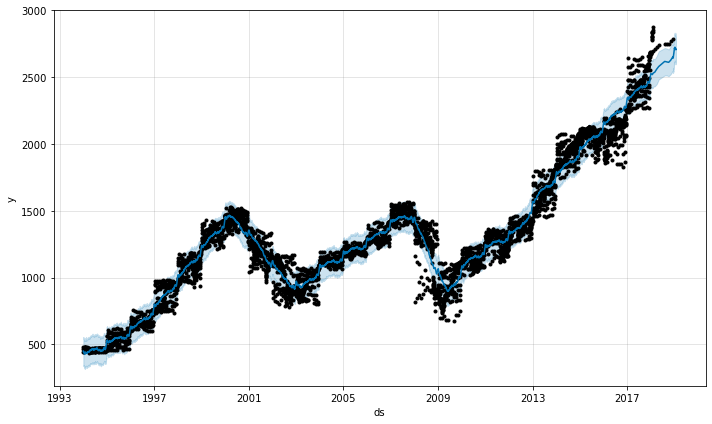

In [40]:
fig = model_weekly.plot(forecast)

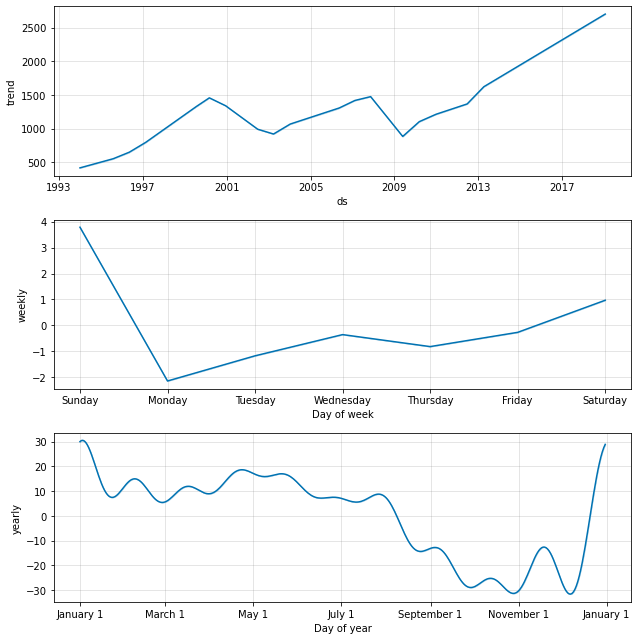

In [41]:
fig2 = model_weekly.plot_components(forecast)